## 작업공간 불러오기 및 패키지 설치

In [1]:
load("C:/Users/eunee/khu_project_2019/data_cleaning.RData")

In [66]:
install.packages("ggplot2")
library(ggplot2)

install.packages("gridExtra")
library(gridExtra)

install.packages("grid")
library(grid)

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'를 열 수 없습니다"Warning message:
"package 'ggplot2' is in use and will not be installed"Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'를 열 수 없습니다"Warning message:
"package 'gridExtra' is in use and will not be installed"Warning message:
"package 'grid' is not available (for R version 3.5.1)"Warning message:
"package 'grid' is a base package, and should not be updated"Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'를 열 수 없습니다"

작업공간을 불러오고, 시각화를 위해 ```ggplot2``` 패키지를 설치한다.

In [3]:
summary(kor)

     SEX           AGE               MARITAL        INCOME       TRTWHY1
 female:308   Min.   :19.00   cohabit    :526   Min.   : 0.000   N:663  
 male  :377   1st Qu.:36.00   non-cohabit: 60   1st Qu.: 3.000   Y: 22  
              Median :44.00   single     : 99   Median : 5.000          
              Mean   :45.01                     Mean   : 5.999          
              3rd Qu.:52.00                     3rd Qu.: 7.000          
              Max.   :81.00                     Max.   :21.000          
 TRTWHY2 TRTWHY3 TRTWHY4
 N:478   N:630   N:604  
 Y:207   Y: 55   Y: 81  
                        
                        
                        
                        

In [4]:
summary(fin)

     SEX           AGE               MARITAL        INCOME       TRTWHY1
 female:280   Min.   :15.00   cohabit    :456   Min.   : 2.303   N:474  
 male  :245   1st Qu.:35.00   non-cohabit: 69   1st Qu.: 8.006   Y: 51  
              Median :48.00                     Median : 8.412          
              Mean   :46.73                     Mean   : 8.386          
              3rd Qu.:60.00                     3rd Qu.: 8.700          
              Max.   :75.00                     Max.   :11.736          
 TRTWHY2 TRTWHY3 TRTWHY4
 N:487   N:485   N:447  
 Y: 38   Y: 40   Y: 78  
                        
                        
                        
                        

본격적인 분석에 앞서 변수들의 분포를 살펴본다.

## 임금

### 한국

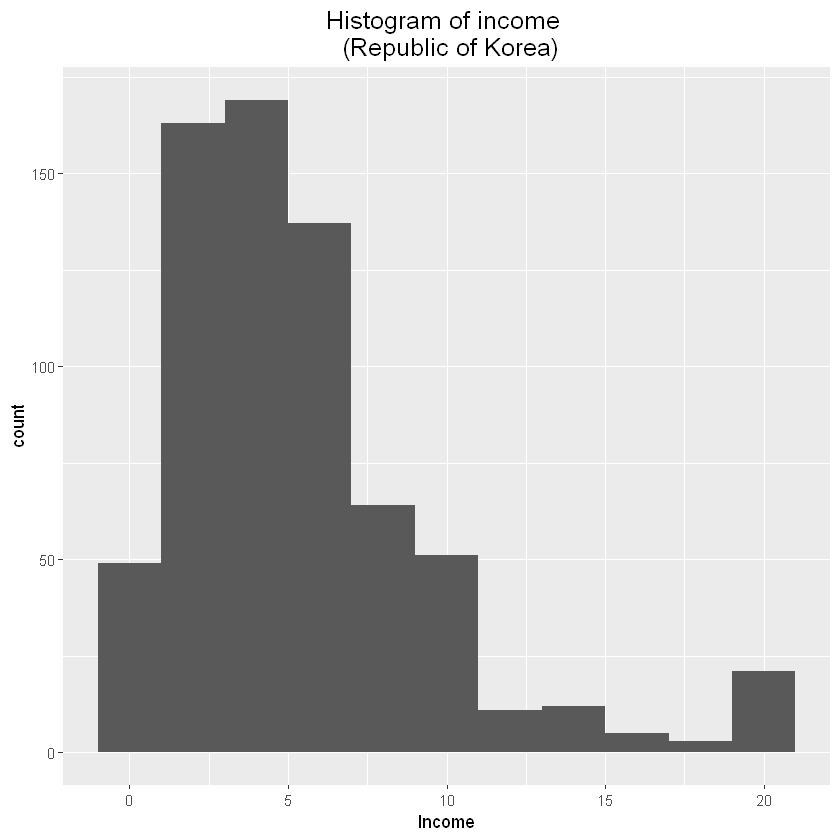

In [116]:
kor_income <- ggplot(kor, aes(x = INCOME)) + geom_histogram(binwidth = 2) + xlab("Income")
kor_income + ggtitle("Histogram of income \n (Republic of Korea)") + theme(plot.title = element_text(size = 15, hjust = 0.5))

한국의 임금은 <u>왼쪽으로 치우쳐진(Right skew)</u> 분포이다. 성별에 따른 임금의 분포를 살펴보면 다음과 같다.

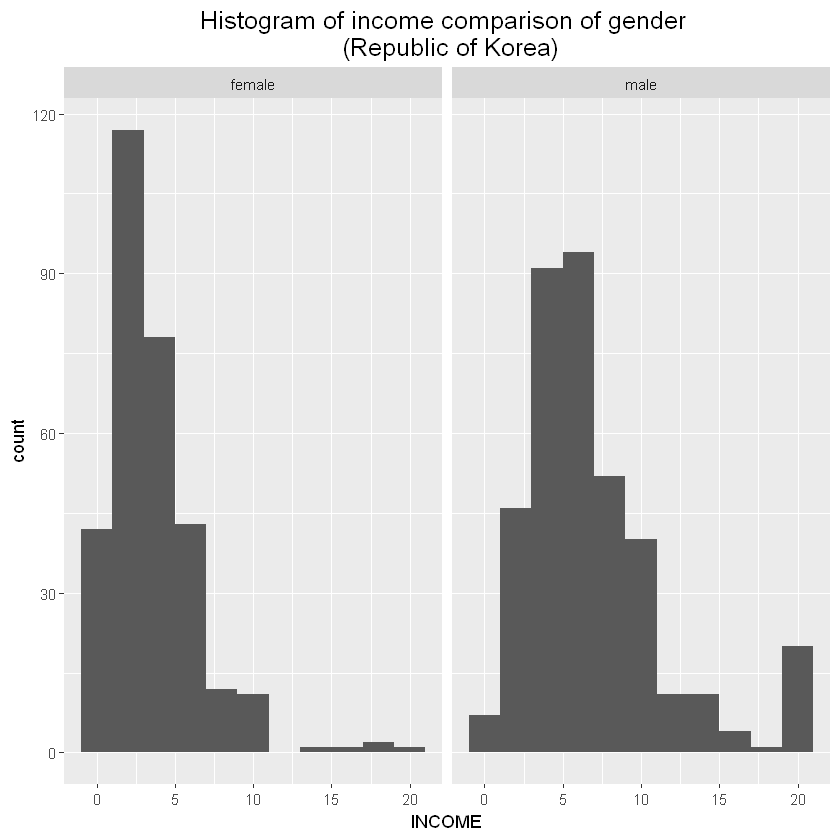

In [117]:
ggplot(kor, aes(x = INCOME)) +
    geom_histogram(position = "dodge", binwidth = 2) +
    facet_grid(.~SEX) +
    ggtitle("Histogram of income comparison of gender \n (Republic of Korea)") +
    theme(plot.title = element_text(size = 15, hjust = 0.5))

<u>여성의 경우 저임금에 더</u> 치우쳤으며, <u>초고임금의 경우 남성이 차지하는 비중이 매우 높았다</u>.

### 핀란드

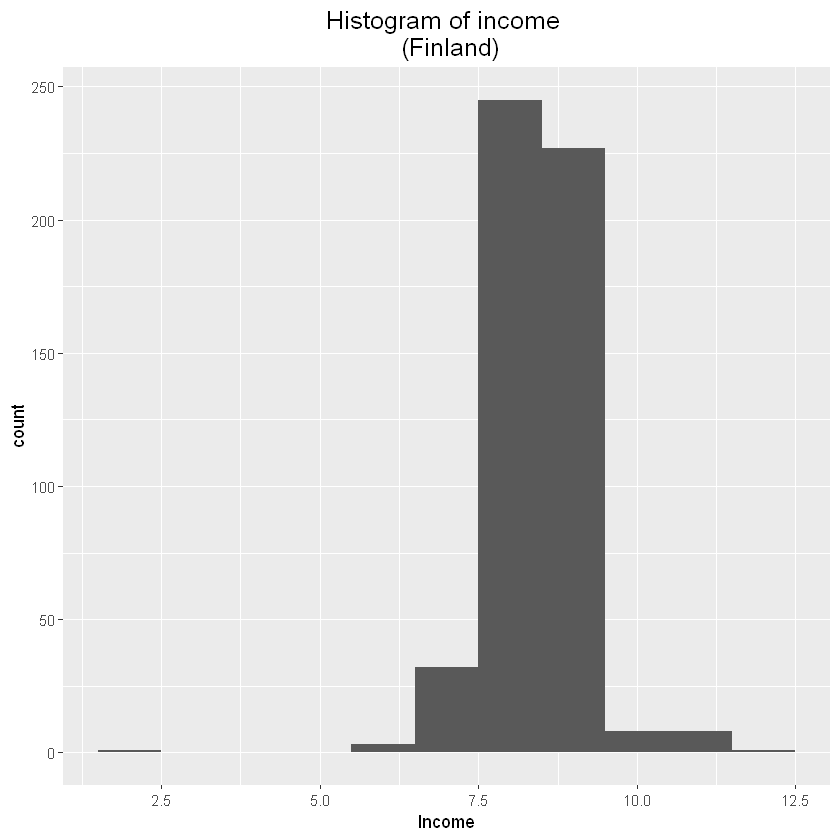

In [148]:
fin_income <- ggplot(fin, aes(x = INCOME)) + geom_histogram(binwidth = 1) + xlab("Income")
fin_income + ggtitle("Histogram of income \n (Finland)") + theme(plot.title = element_text(size = 15, hjust = 0.5))

핀란드의 임금 변수는 변수 클리닝 단계에서 로그를 취한 '로그 임금'이다.     
핀란드의 임금은 <u>오른쪽으로 치우친(left skew)</u> 분포이나, 치우침의 정도가 한국에 비해 덜하다.

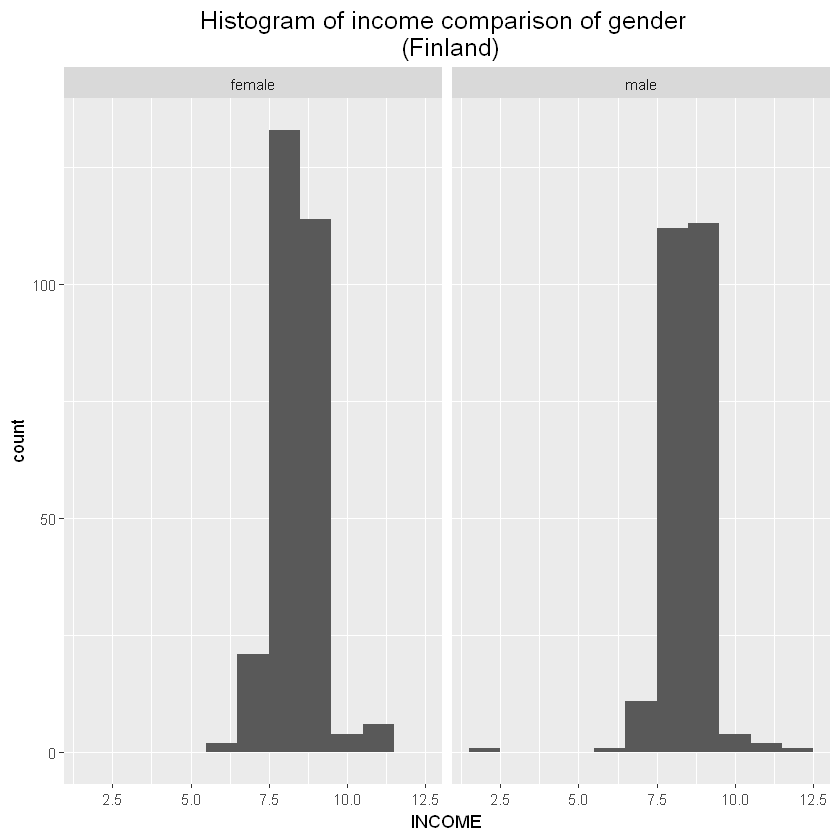

In [119]:
ggplot(fin, aes(x = INCOME)) +
    geom_histogram(position = "dodge", binwidth = 1) +
    facet_grid(.~SEX) +
    ggtitle("Histogram of income comparison of gender \n (Finland)") +
    theme(plot.title = element_text(size = 15, hjust = 0.5))

<u>여성은 중위 임금에 몰려 분포</u>하는 경향이 있으며, <u>초저임금과 초고임금에 남성이 분포</u>한다.

### 한국과 핀란드 비교

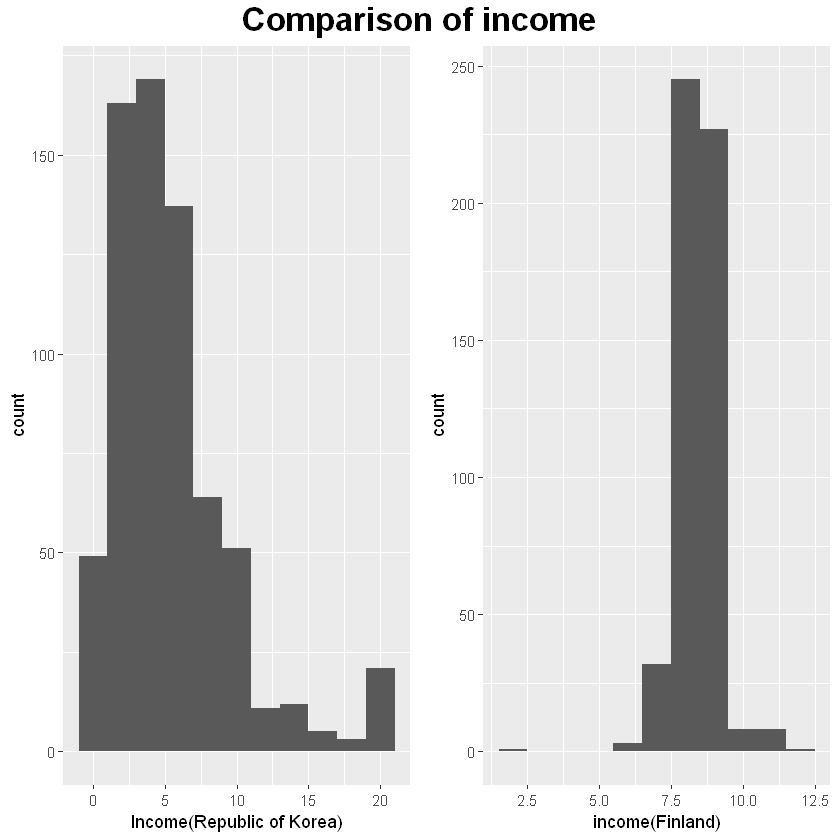

In [153]:
grid.arrange(kor_income + xlab("Income(Republic of Korea)"), fin_income + xlab("income(Finland)"), ncol = 2, 
             top = textGrob("Comparison of income", gp = gpar(fontsize = 20, font = 2)))

왼쪽이 한국, 오른쪽이 핀란드의 임금 분포이다.

## 치료 못 받았던 경험 : 비용을 지불할 능력이 없어서

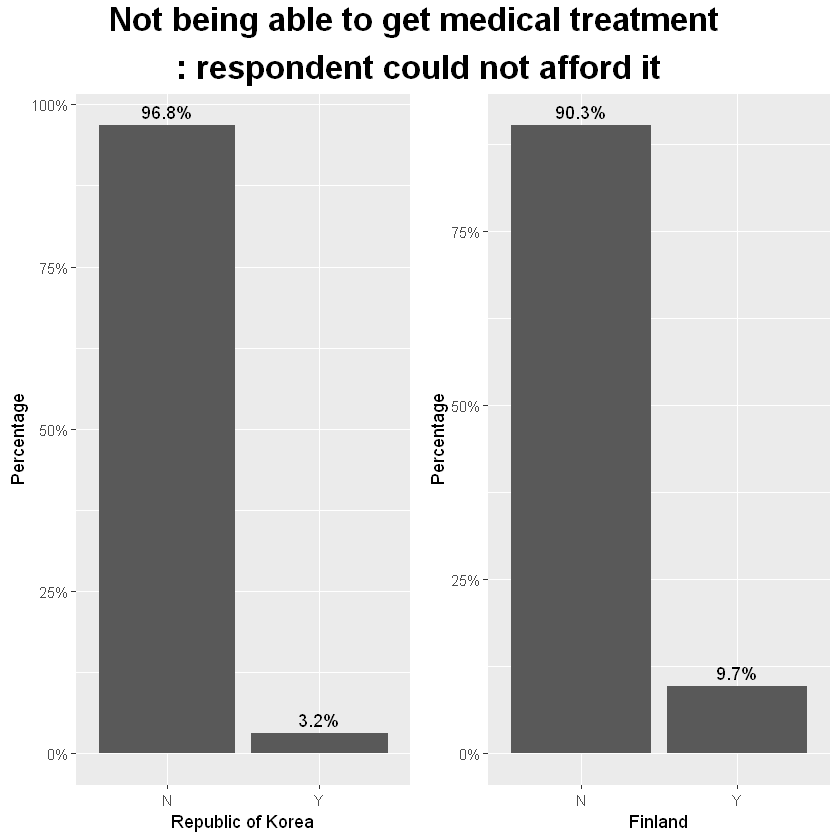

In [150]:
kor_trtwhy1 <- ggplot(kor, aes(x = TRTWHY1)) +
                geom_bar(aes(y = (..count..)/sum(..count..))) + 
                scale_y_continuous(labels = scales::percent) +
                geom_text(aes( label = scales::percent((..count..)/sum(..count..)),
                   y= (..count..)/sum(..count..) ), stat= "count", vjust = -.5) +
                xlab("Republic of Korea") +
                ylab("Percentage")

fin_trtwhy1 <- ggplot(fin, aes(x = TRTWHY1)) +
                geom_bar(aes(y = (..count..)/sum(..count..))) + 
                scale_y_continuous(labels = scales::percent) +
                geom_text(aes( label = scales::percent((..count..)/sum(..count..)),
                   y= (..count..)/sum(..count..) ), stat= "count", vjust = -.5) +
                xlab("Finland") +
                ylab("Percentage")


grid.arrange(kor_trtwhy1, fin_trtwhy1, ncol = 2,
                top = textGrob("Not being able to get medical treatment \n: respondent could not afford it", gp = gpar(fontsize = 20, font = 2)))

## 치료 못 받았던 경험 : 직장을 빠지고 갈 시간이 없거나 다른 일로 바빠서 

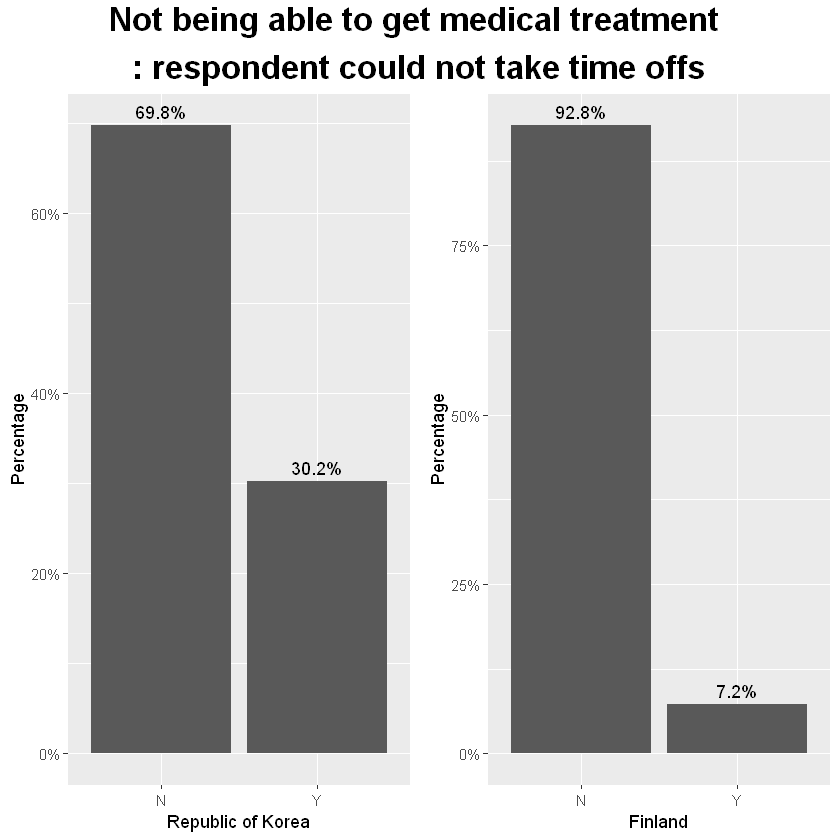

In [141]:
kor_trtwhy2 <- ggplot(kor, aes(x = TRTWHY2)) +
                geom_bar(aes(y = (..count..)/sum(..count..))) + 
                scale_y_continuous(labels = scales::percent) +
                geom_text(aes( label = scales::percent((..count..)/sum(..count..)),
                   y= (..count..)/sum(..count..) ), stat= "count", vjust = -.5) +
                xlab("Republic of Korea") +
                ylab("Percentage")

fin_trtwhy2 <- ggplot(fin, aes(x = TRTWHY2)) +
                geom_bar(aes(y = (..count..)/sum(..count..))) + 
                scale_y_continuous(labels = scales::percent) +
                geom_text(aes( label = scales::percent((..count..)/sum(..count..)),
                   y= (..count..)/sum(..count..) ), stat= "count", vjust = -.5) +
                xlab("Finland") +
                ylab("Percentage")


grid.arrange(kor_trtwhy2, fin_trtwhy2, ncol = 2,
                top = textGrob("Not being able to get medical treatment \n: respondent could not take time offs", gp = gpar(fontsize = 20, font = 2)))

## 치료 못 받았던 경험 : 거주하는 동네나 인근에서는 필요한 치료를 받을 수 없어서

### 한국

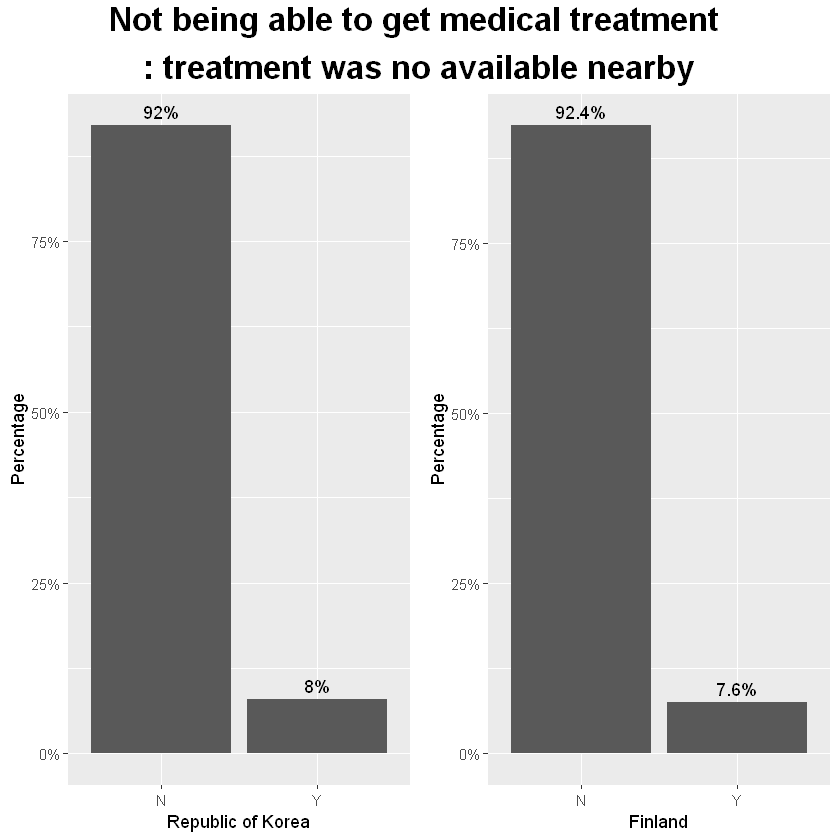

In [142]:
kor_trtwhy3 <- ggplot(kor, aes(x = TRTWHY3)) +
                geom_bar(aes(y = (..count..)/sum(..count..))) + 
                scale_y_continuous(labels = scales::percent) +
                geom_text(aes( label = scales::percent((..count..)/sum(..count..)),
                   y= (..count..)/sum(..count..) ), stat= "count", vjust = -.5) +
                xlab("Republic of Korea") +
                ylab("Percentage")

fin_trtwhy3 <- ggplot(fin, aes(x = TRTWHY3)) +
                geom_bar(aes(y = (..count..)/sum(..count..))) + 
                scale_y_continuous(labels = scales::percent) +
                geom_text(aes( label = scales::percent((..count..)/sum(..count..)),
                   y= (..count..)/sum(..count..) ), stat= "count", vjust = -.5) +
                xlab("Finland") +
                ylab("Percentage")


grid.arrange(kor_trtwhy3, fin_trtwhy3, ncol = 2,
                top = textGrob("Not being able to get medical treatment \n: treatment was no available nearby", gp = gpar(fontsize = 20, font = 2)))

## 치료 못 받았던 경험 : 치료를 기다리는 사람들이 너무 많아서

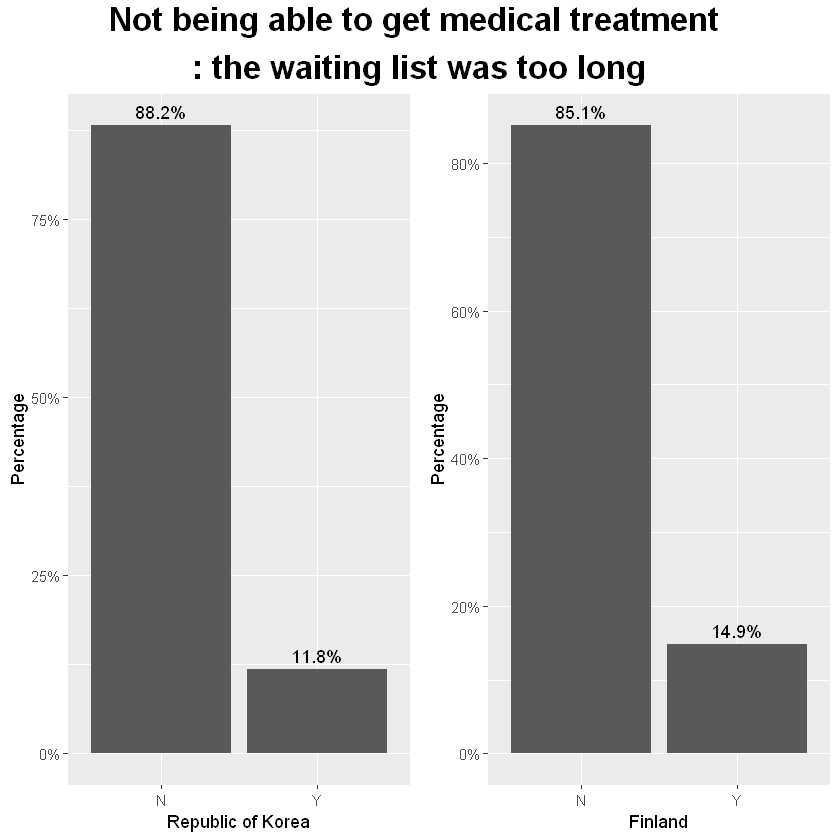

In [144]:
kor_trtwhy4 <- ggplot(kor, aes(x = TRTWHY4)) +
                geom_bar(aes(y = (..count..)/sum(..count..))) + 
                scale_y_continuous(labels = scales::percent) +
                geom_text(aes( label = scales::percent((..count..)/sum(..count..)),
                   y= (..count..)/sum(..count..) ), stat= "count", vjust = -.5) +
                xlab("Republic of Korea") +
                ylab("Percentage")

fin_trtwhy4 <- ggplot(fin, aes(x = TRTWHY4)) +
                geom_bar(aes(y = (..count..)/sum(..count..))) + 
                scale_y_continuous(labels = scales::percent) +
                geom_text(aes( label = scales::percent((..count..)/sum(..count..)),
                   y= (..count..)/sum(..count..) ), stat= "count", vjust = -.5) +
                xlab("Finland") +
                ylab("Percentage")


grid.arrange(kor_trtwhy4, fin_trtwhy4, ncol = 2,
                top = textGrob("Not being able to get medical treatment \n: the waiting list was too long", gp = gpar(fontsize = 20, font = 2)))

종속 변수가 **이항변수**이기 때문에 최소제곱법을 사용한 회귀분석을 할 수 없다.

### 로지스틱 회귀분석

In [16]:
summary(glm(TRTWHY1 ~ INCOME, family = binomial(link = 'logit'), data = kor))


Call:
glm(formula = TRTWHY1 ~ INCOME, family = binomial(link = "logit"), 
    data = kor)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.63811  -0.30726  -0.18520  -0.08598   3.02699  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.4881     0.3574  -4.164 3.12e-05 ***
INCOME       -0.5138     0.1144  -4.493 7.01e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 194.57  on 684  degrees of freedom
Residual deviance: 164.01  on 683  degrees of freedom
AIC: 168.01

Number of Fisher Scoring iterations: 8


```INCOME```이 한 단위 증가할 때 비용을 지불할 능력이 없어서 치료받지 못한 경험(```TRTWHY1```)의 log odds가 0.5138 감소한다.

In [17]:
summary(glm(TRTWHY1 ~ INCOME+SEX, family = binomial(link = 'logit'), data = kor))


Call:
glm(formula = TRTWHY1 ~ INCOME + SEX, family = binomial(link = "logit"), 
    data = kor)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9337  -0.2485  -0.1618  -0.0723   3.0702  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.5996     0.3722  -4.298 1.72e-05 ***
INCOME       -0.6209     0.1317  -4.714 2.43e-06 ***
SEXmale       0.9951     0.5083   1.958   0.0503 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 194.57  on 684  degrees of freedom
Residual deviance: 160.22  on 682  degrees of freedom
AIC: 166.22

Number of Fisher Scoring iterations: 8


소득이 동일하다면 여성이 비용을 지불할 능력이 없어서 치료받지 못한 경험(```TRTWHY1```)의 승산이 남성에 비해 exp(-0.9951) = 0.3697배이다.    
다시 말해 소득을 통제하면 여성이 남성에 비해 비용을 지불할 능력이 없어서 치료받지 못할 확률이 높다.

In [18]:
summary(glm(TRTWHY1 ~ INCOME+MARITAL, family = binomial(link = 'logit'), data = kor))


Call:
glm(formula = TRTWHY1 ~ INCOME + MARITAL, family = binomial(link = "logit"), 
    data = kor)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.79892  -0.27356  -0.16256  -0.07398   3.11587  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.6872     0.4002  -4.216 2.49e-05 ***
INCOME              -0.5266     0.1222  -4.309 1.64e-05 ***
MARITALnon-cohabit   0.7089     0.5613   1.263    0.207    
MARITALsingle        0.6500     0.6105   1.065    0.287    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 194.57  on 684  degrees of freedom
Residual deviance: 161.89  on 681  degrees of freedom
AIC: 169.89

Number of Fisher Scoring iterations: 8


소득을 통제하면 비동거(```non-cohabit```)나 미혼(```single```)이 동거(```cohabit```)에 비해 비용을 지불할 능력이 없어서 치료받지 못한 경험(```TRTWHY1```)이 승산이 각각 exp(0.7089) = 2.0318배, exp(0.6500) = 1.9155배이다.